In [1]:
## Import packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## find file path

%cd /Users/tianqi/Downloads/Capstone Data

/Users/tianqi/Downloads/Capstone Data


In [3]:
df = pd.read_csv('/Users/tianqi/Downloads/Capstone Data/cluster13eggs.csv')

In [4]:
df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,holiday_type,transferred,class,dcoilwtico
0,625,2013-01-02,1,127547,14.0,True,Quito,Pichincha,Work Day,True,2502,93.14
1,638,2013-01-02,1,158680,5.0,True,Quito,Pichincha,Work Day,True,2502,93.14
2,678,2013-01-02,1,208384,32.0,True,Quito,Pichincha,Work Day,True,2502,93.14
3,679,2013-01-02,1,208386,7.0,True,Quito,Pichincha,Work Day,True,2502,93.14
4,718,2013-01-02,1,227111,9.0,True,Quito,Pichincha,Work Day,True,2502,93.14


In [5]:
## change data type of "date", (not necessary in Azure)
df['date'] = df['date'].astype('datetime64[ns]')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155689 entries, 0 to 155688
Data columns (total 12 columns):
id              155689 non-null int64
date            155689 non-null datetime64[ns]
store_nbr       155689 non-null int64
item_nbr        155689 non-null int64
unit_sales      155689 non-null float64
onpromotion     155689 non-null bool
city            155689 non-null object
state           155689 non-null object
holiday_type    155689 non-null object
transferred     155689 non-null bool
class           155689 non-null int64
dcoilwtico      155689 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 12.2+ MB


In [7]:
df['holiday_type'].unique()

array(['Work Day', 'Holiday', 'Additional', 'Event', 'Transfer', 'Bridge'],
      dtype=object)

In [8]:
## obtain total unit_sales for each store on each day
store_sales = df.groupby(['date', 'store_nbr'])["unit_sales"].apply(lambda x : x.astype(int).sum()).reset_index()
store_sales.head()

## there are still multiple time series, so groupby date

,date,store_nbr,unit_sales
0,2013-01-02,1,246
1,2013-01-02,2,307
2,2013-01-02,6,360
3,2013-01-03,1,203
4,2013-01-03,2,186


In [9]:
## obtain total unit_sales on each day
total_sales = df.groupby('date')["unit_sales"].apply(lambda x : x.astype(int).sum()).reset_index()
total_sales = total_sales.set_index('date')
total_sales.head()

,unit_sales
date,
2013-01-02,913
2013-01-03,642
2013-01-04,563
2013-01-05,661
2013-01-06,801


In [10]:
df.drop(['id', 'store_nbr', 'city', 'state', 'item_nbr', 
                    'unit_sales', 'onpromotion', 'holiday_type', 
                    'transferred', 'class'],axis=1,inplace=True)

oilPrice = df.drop_duplicates('date')
oilPrice = oilPrice.set_index('date')
oilPrice.head()

,dcoilwtico
date,
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-05,93.12
2013-01-06,93.12


In [11]:
## a new dataframe with date, total unit sales and oil prices
data=pd.merge(total_sales,oilPrice,on='date',how="left")
data.head(10)

,unit_sales,dcoilwtico
date,,
2013-01-02,913,93.14
2013-01-03,642,92.97
2013-01-04,563,93.12
2013-01-05,661,93.12
2013-01-06,801,93.12
2013-01-07,505,93.20
2013-01-08,448,93.21
2013-01-09,486,93.08
2013-01-10,368,93.81


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1679 entries, 2013-01-02 to 2017-08-15
Data columns (total 2 columns):
unit_sales    1679 non-null int64
dcoilwtico    1679 non-null float64
dtypes: float64(1), int64(1)
memory usage: 39.4 KB


In [13]:
#creating the train and validation set
train = data.loc[:'2016-12-31']
test = data.loc['2017-01-01':]

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                Statespace Model Results                                
Dep. Variable:     ['unit_sales', 'dcoilwtico']   No. Observations:                 1679
Model:                               VARMA(5,1)   Log Likelihood              -12822.800
                                    + intercept   AIC                          25703.601
Date:                          Thu, 31 Oct 2019   BIC                          25860.953
Time:                                  13:01:38   HQIC                         25761.889
Sample:                                       0                                         
                                         - 1679                                         
Covariance Type:                            opg                                         
Ljung-Box (Q):              2265.32, 27.57   Jarque-Bera (JB):    22635.09, 1460.33
Prob(Q):                        0.00, 0.93   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):        

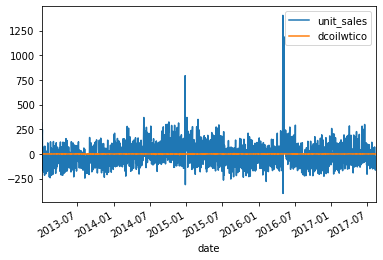

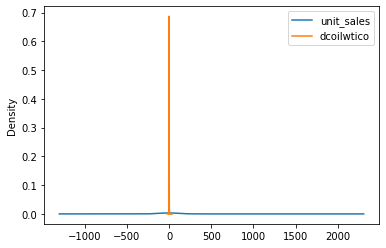

        unit_sales   dcoilwtico
count  1679.000000  1679.000000
mean     -0.025320    -0.015350
std     119.350109     1.169470
min    -400.245085    -7.707340
25%     -81.388929    -0.389531
50%      -3.307036    -0.005471
75%      71.233495     0.361860
max    1405.182232    23.736518


In [19]:
# VARMA example
from pandas import DataFrame
from matplotlib import pyplot
from statsmodels.tsa.statespace.varmax import VARMAX

# fit model
model = VARMAX(data, order=(5, 1))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

1. model results including the coefficient values

2. Line plot of the residual errors;

3. Density plot of the residual error values;

4. The distribution of the residual errors is displayed.

The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).

In [20]:
# make prediction on validation
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime('201'+x, '%Y-%m')
 
series = data
X = series.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = VARMAX(history, order=(1, 1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

## Test MSE: 6485.898

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/var

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/

Test MSE: 6485.898


/Users/tianqi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


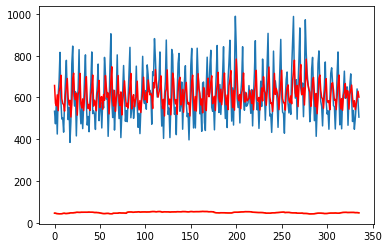

In [21]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [22]:
### Mean absolute percentage error (MAPE)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_true = test; y_pred = predictions

mean_absolute_percentage_error(y_true, y_pred)

8.418880079514206